In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
flights=pd.read_csv('On_Time_On_Time_Performance_2017_1.csv')

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (48,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(flights.shape)
print(flights.head())

(450017, 110)
   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate UniqueCarrier  \
0  2017        1      1          17          2  2017-01-17            AA   
1  2017        1      1          18          3  2017-01-18            AA   
2  2017        1      1          19          4  2017-01-19            AA   
3  2017        1      1          20          5  2017-01-20            AA   
4  2017        1      1          21          6  2017-01-21            AA   

   AirlineID Carrier TailNum      ...       Div4TailNum  Div5Airport  \
0      19805      AA  N583AA      ...               NaN          NaN   
1      19805      AA  N544AA      ...               NaN          NaN   
2      19805      AA  N553AA      ...               NaN          NaN   
3      19805      AA  N191AA      ...               NaN          NaN   
4      19805      AA  N170AA      ...               NaN          NaN   

   Div5AirportID  Div5AirportSeqID Div5WheelsOn Div5TotalGTime  \
0            NaN              

In [4]:
flights = flights[flights['Month'] == 1]
flights.shape


(450017, 110)

MemoryError: 

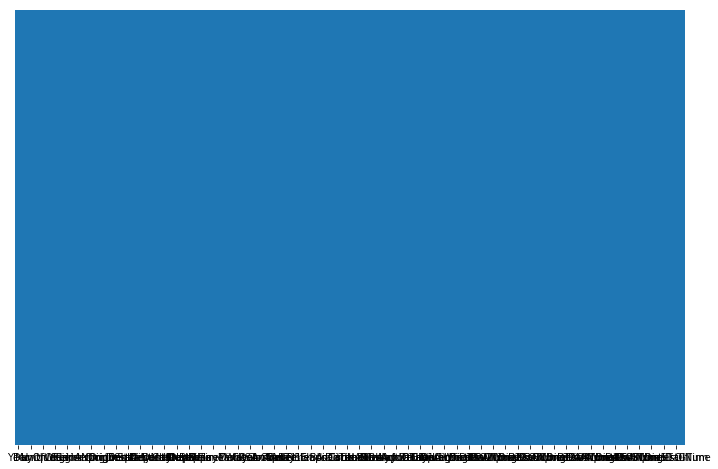

In [5]:
plt.figure(figsize = (12, 8))
sns.heatmap(flights.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
for i in flights.columns:
    if flights[i].isnull().sum() > 300000:
        flights.drop(i, axis = 1, inplace = True)

In [7]:
for i in flights.columns:
    if flights[i].nunique() == 1:
        flights.drop(i, axis = 1, inplace = True)

In [8]:
missing_df = flights.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(flights.shape[0]-missing_df['missing values'])/flights.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,ArrDelay,10372,97.695198
1,ArrDelayMinutes,10372,97.695198
2,ArrDel15,10372,97.695198
3,ArrivalDelayGroups,10372,97.695198
4,AirTime,10372,97.695198
5,ActualElapsedTime,10372,97.695198
6,ArrTime,9271,97.939856
7,TaxiIn,9271,97.939856
8,WheelsOn,9271,97.939856
9,WheelsOff,8773,98.050518


In [9]:
flights.dropna(inplace = True)
flights.shape

(439645, 52)

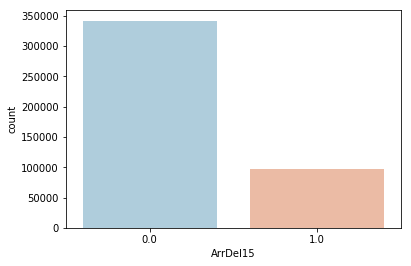

In [10]:
sns.countplot(x='ArrDel15',data=flights,palette='RdBu_r')


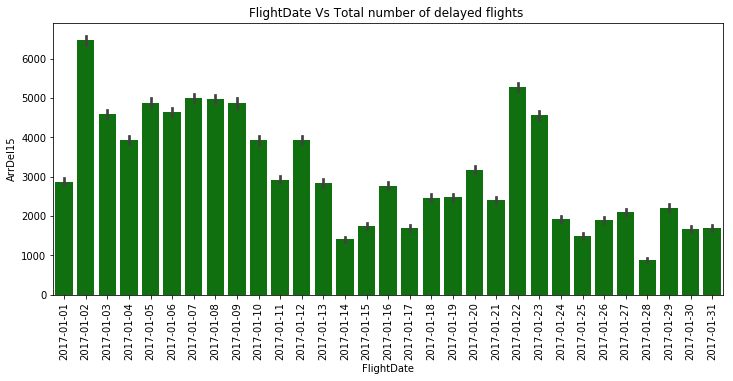

In [11]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=90)
order = np.unique(list(flights['FlightDate']))
ax = sns.barplot(x='FlightDate',y ='ArrDel15', data=flights, color = "green" , order = order , estimator = np.sum)
fig = plt.title("FlightDate Vs Total number of delayed flights ")

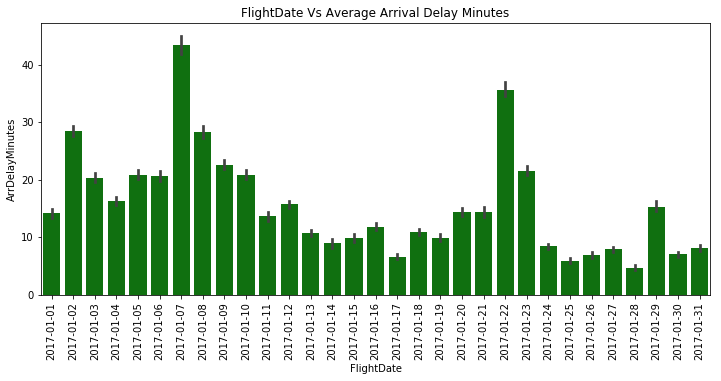

In [12]:
plt.figure(figsize=(12, 5))
order = np.unique(list(flights['FlightDate']))
ax = sns.barplot(x='FlightDate',y ='ArrDelayMinutes', data=flights, color = "green" , order = order , estimator = np.mean)
plt.xticks(rotation=90)
fig = plt.title("FlightDate Vs Average Arrival Delay Minutes")

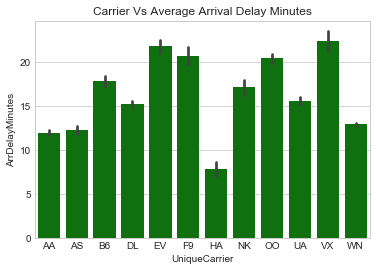

In [13]:
sns.set_style('whitegrid')
carrier_order = np.unique(list(flights['UniqueCarrier']))
sns.barplot(x='UniqueCarrier',y ='ArrDelayMinutes', data=flights, color = "green" , order = carrier_order,estimator=np.mean)
fig = plt.title("Carrier Vs Average Arrival Delay Minutes")

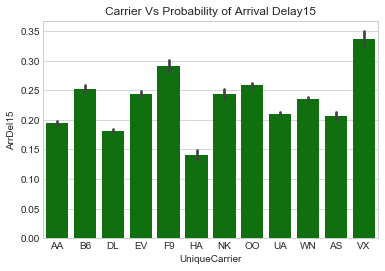

In [14]:
sns.set_style('whitegrid')
sns.barplot(x='UniqueCarrier', y ="ArrDel15", data=flights, color ='green')
fig = plt.title("Carrier Vs Probability of Arrival Delay15")

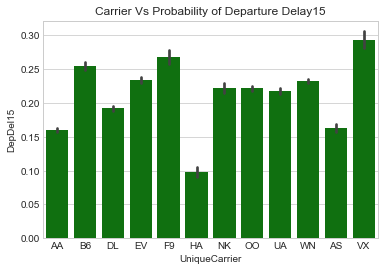

In [15]:
sns.set_style('whitegrid')
sns.barplot(x='UniqueCarrier', y ="DepDel15", data=flights, color ='green')
fig = plt.title("Carrier Vs Probability of Departure Delay15")

In [16]:
def Impute_month(cols):
    if cols in [1,2,3,4,5,6,7]:
        return "weekI"

    elif cols in [8,9,10,11,12,13,14]:
        return "weekII"

    elif cols in [15,16,17,18,19,20,21]:
        return "weekIII"

    elif cols in [22,23,24,25,26,27,28]:
        return "weekIV"

    else:
        return "weekV"
    
flights['Month'] = flights["DayofMonth"].apply(Impute_month)
flights.drop("DayofMonth", axis = 1, inplace = True)

In [17]:
def Impute_week(cols):
    if cols in [1,7]:
        return "Weekend"

    else:
        return "Weekdays"
    
    
flights['Week'] = flights["DayOfWeek"].apply(Impute_week)
flights.drop("DayOfWeek", axis = 1, inplace = True)

In [18]:
flights.head()

,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,FlightNum,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,...,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,DivAirportLandings,Month,Week
0,2017-01-17,AA,19805,AA,N583AA,494,11057,1105703,31057,CLT,...,0.0,0.0,277.0,266.0,244.0,1773.0,8,0,weekIII,Weekdays
1,2017-01-18,AA,19805,AA,N544AA,494,11057,1105703,31057,CLT,...,0.0,0.0,277.0,247.0,228.0,1773.0,8,0,weekIII,Weekdays
2,2017-01-19,AA,19805,AA,N553AA,494,11057,1105703,31057,CLT,...,0.0,0.0,277.0,255.0,236.0,1773.0,8,0,weekIII,Weekdays
3,2017-01-20,AA,19805,AA,N191AA,494,11057,1105703,31057,CLT,...,0.0,0.0,277.0,273.0,252.0,1773.0,8,0,weekIII,Weekdays
4,2017-01-21,AA,19805,AA,N170AA,494,11057,1105703,31057,CLT,...,0.0,0.0,277.0,266.0,245.0,1773.0,8,0,weekIII,Weekdays


In [19]:
Month_grouped1 = flights.groupby('Month')["ArrDel15"].sum()
Month_grouped2 = flights.groupby('Month')["ArrDel15"].count()
print(Month_grouped1)
print(Month_grouped2)
Month_grouped = pd.concat([Month_grouped1, Month_grouped2],axis=1, keys=["sum", "count"])
Month_grouped["Average number of delays"] = Month_grouped["sum"]/Month_grouped["count"]
print(Month_grouped)

Month
weekI      32379.0
weekII     24880.0
weekIII    16745.0
weekIV     18128.0
weekV       5567.0
Name: ArrDel15, dtype: float64
Month
weekI       98030
weekII      98943
weekIII     99004
weekIV     100142
weekV       43526
Name: ArrDel15, dtype: int64
             sum   count  Average number of delays
Month                                             
weekI    32379.0   98030                  0.330297
weekII   24880.0   98943                  0.251458
weekIII  16745.0   99004                  0.169135
weekIV   18128.0  100142                  0.181023
weekV     5567.0   43526                  0.127901


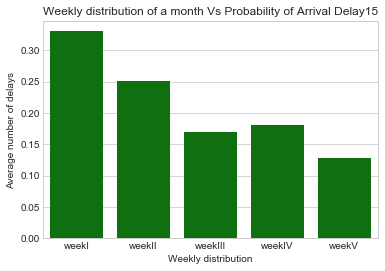

In [20]:
sns.set_style('whitegrid')
sns.barplot(x=Month_grouped.index, y ='Average number of delays', data=Month_grouped, color ='green')
plt.xlabel("Weekly distribution")
plt.ylabel("Average number of delays")
fig = plt.title("Weekly distribution of a month Vs Probability of Arrival Delay15")

In [21]:
week_grouped1 = flights.groupby('Week')["ArrDel15"].sum()
week_grouped2 = flights.groupby('Week')["ArrDel15"].count()
print(week_grouped1)
print(week_grouped2)
week_grouped = pd.concat([week_grouped1, week_grouped2],axis=1, keys=["sum", "count"])
week_grouped["Probability of Arrival Delay15"] = week_grouped["sum"]/week_grouped["count"]

Week
Weekdays    60280.0
Weekend     37419.0
Name: ArrDel15, dtype: float64
Week
Weekdays    296536
Weekend     143109
Name: ArrDel15, dtype: int64


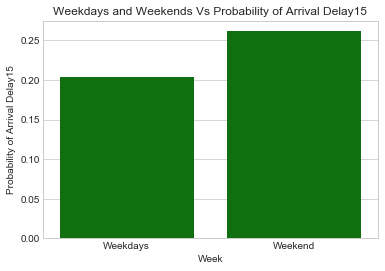

In [22]:
sns.set_style('whitegrid')
sns.barplot(x=week_grouped.index, y ='Probability of Arrival Delay15', data=week_grouped, color ='green')
plt.ylabel("Probability of Arrival Delay15")
fig = plt.title("Weekdays and Weekends Vs Probability of Arrival Delay15")

In [23]:
airport_grouped1 = flights.groupby('Origin')["ArrDel15"].sum()
airport_grouped2 = flights.groupby('Origin')["ArrDel15"].count()
airport_grouped = pd.concat([airport_grouped1, airport_grouped2],axis=1, keys=["sum", "count"])
airport_grouped["Probability of Arrival Delay15"] = airport_grouped["sum"]/airport_grouped["count"]
airport_grouped.sort_values(by = "Probability of Arrival Delay15", ascending = False, inplace = True)

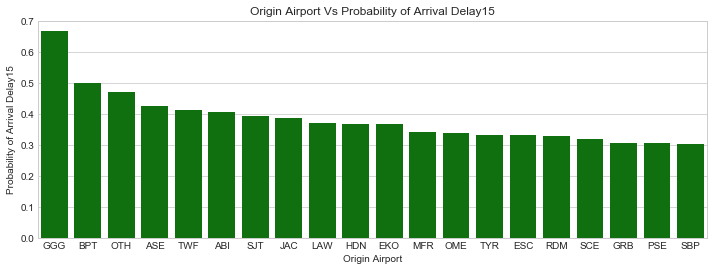

In [24]:
plt.figure(figsize = (12, 4))
sns.set_style('whitegrid')
sns.barplot(x=airport_grouped.index[:20], y = "Probability of Arrival Delay15", data=airport_grouped[:20], color ='green')
plt.xlabel("Origin Airport")
plt.ylabel("Probability of Arrival Delay15")
fig = plt.title("Origin Airport Vs Probability of Arrival Delay15")

In [25]:
airport_grouped3 = flights.groupby('Dest')["ArrDel15"].sum()
airport_grouped4 = flights.groupby('Dest')["ArrDel15"].count()
airport_grouped_dest = pd.concat([airport_grouped3, airport_grouped4],axis=1, keys=["sum", "count"])
airport_grouped_dest["Probability of Arrival Delay15"] = airport_grouped_dest["sum"]/airport_grouped_dest["count"]
airport_grouped_dest.sort_values(by = "Probability of Arrival Delay15", ascending = False, inplace = True)

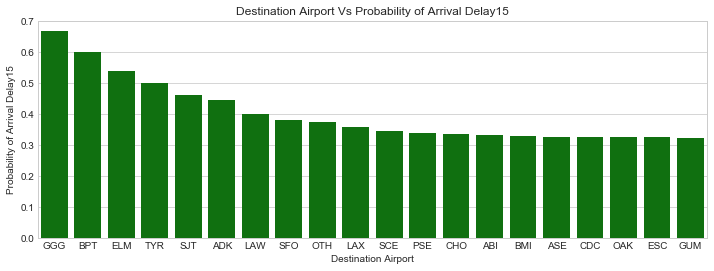

In [26]:
plt.figure(figsize = (12, 4))
sns.set_style('whitegrid')
sns.barplot(x=airport_grouped_dest.index[:20], y ='Probability of Arrival Delay15', data=airport_grouped_dest[:20], color ='green')
plt.xlabel("Destination Airport")
plt.ylabel("Probability of Arrival Delay15")
fig = plt.title("Destination Airport Vs Probability of Arrival Delay15")

In [27]:
flights["Flight_route"] = flights["Origin"] + " to " + flights["Dest"]
flightroute = flights.groupby('Flight_route').sum()
flightroute.sort_values(by = "ArrDel15", axis = 0, ascending = False, inplace = True)

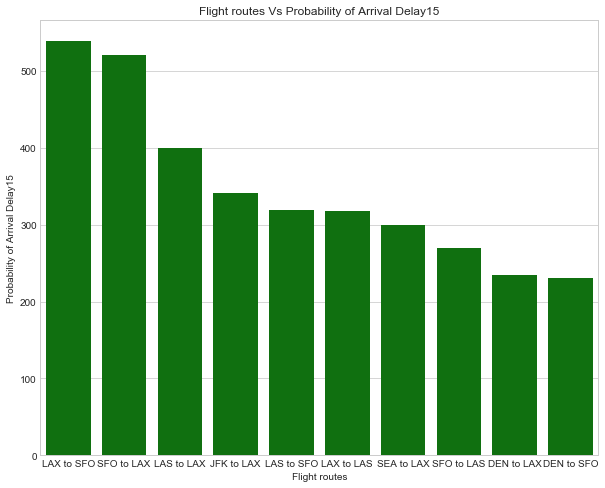

In [28]:
plt.figure(figsize = (10, 8))
sns.set_style('whitegrid')
fig = sns.barplot(x=flightroute.index[:10], y = "ArrDel15", data=flightroute[:10], color ='green')
fig.set(xlabel = 'Flight routes', ylabel = 'Probability of Arrival Delay15')
fig = plt.title("Flight routes Vs Probability of Arrival Delay15")

In [29]:
def impute_time(cols):
    if cols >= 600 and cols < 1200:
        return "Morning"
    elif cols >= 1200 and cols < 1600:
        return "Afternoon"
    else:
        return "Evening"
    
    
flights['Arrival_Time'] = flights["CRSArrTime"].apply(impute_time)
flights.drop("CRSArrTime", axis = 1, inplace = True)

In [30]:
flights['Departure_Time'] = flights["CRSDepTime"].apply(impute_time)
flights.drop("CRSDepTime", axis = 1, inplace = True)

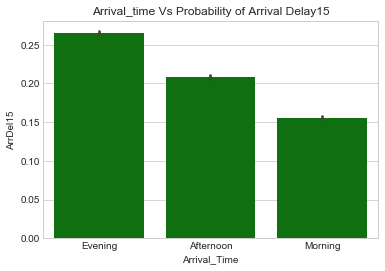

In [31]:
sns.set_style('whitegrid')
sns.barplot(x=flights.Arrival_Time, y ="ArrDel15", data=flights, color ='green')
fig = plt.title("Arrival_time Vs Probability of Arrival Delay15")

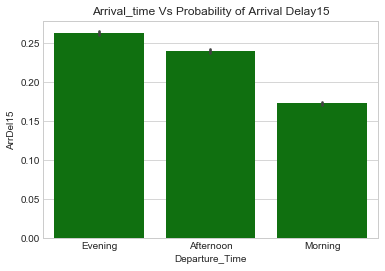

In [32]:
sns.set_style('whitegrid')
sns.barplot(x=flights.Departure_Time, y ="ArrDel15", data=flights, color ='green')
fig = plt.title("Arrival_time Vs Probability of Arrival Delay15")

In [33]:
print(flights.head())

   FlightDate UniqueCarrier  AirlineID Carrier TailNum  FlightNum  \
0  2017-01-17            AA      19805      AA  N583AA        494   
1  2017-01-18            AA      19805      AA  N544AA        494   
2  2017-01-19            AA      19805      AA  N553AA        494   
3  2017-01-20            AA      19805      AA  N191AA        494   
4  2017-01-21            AA      19805      AA  N170AA        494   

   OriginAirportID  OriginAirportSeqID  OriginCityMarketID Origin  \
0            11057             1105703               31057    CLT   
1            11057             1105703               31057    CLT   
2            11057             1105703               31057    CLT   
3            11057             1105703               31057    CLT   
4            11057             1105703               31057    CLT   

       ...       ActualElapsedTime AirTime  Distance DistanceGroup  \
0      ...                   266.0   244.0    1773.0             8   
1      ...                   2

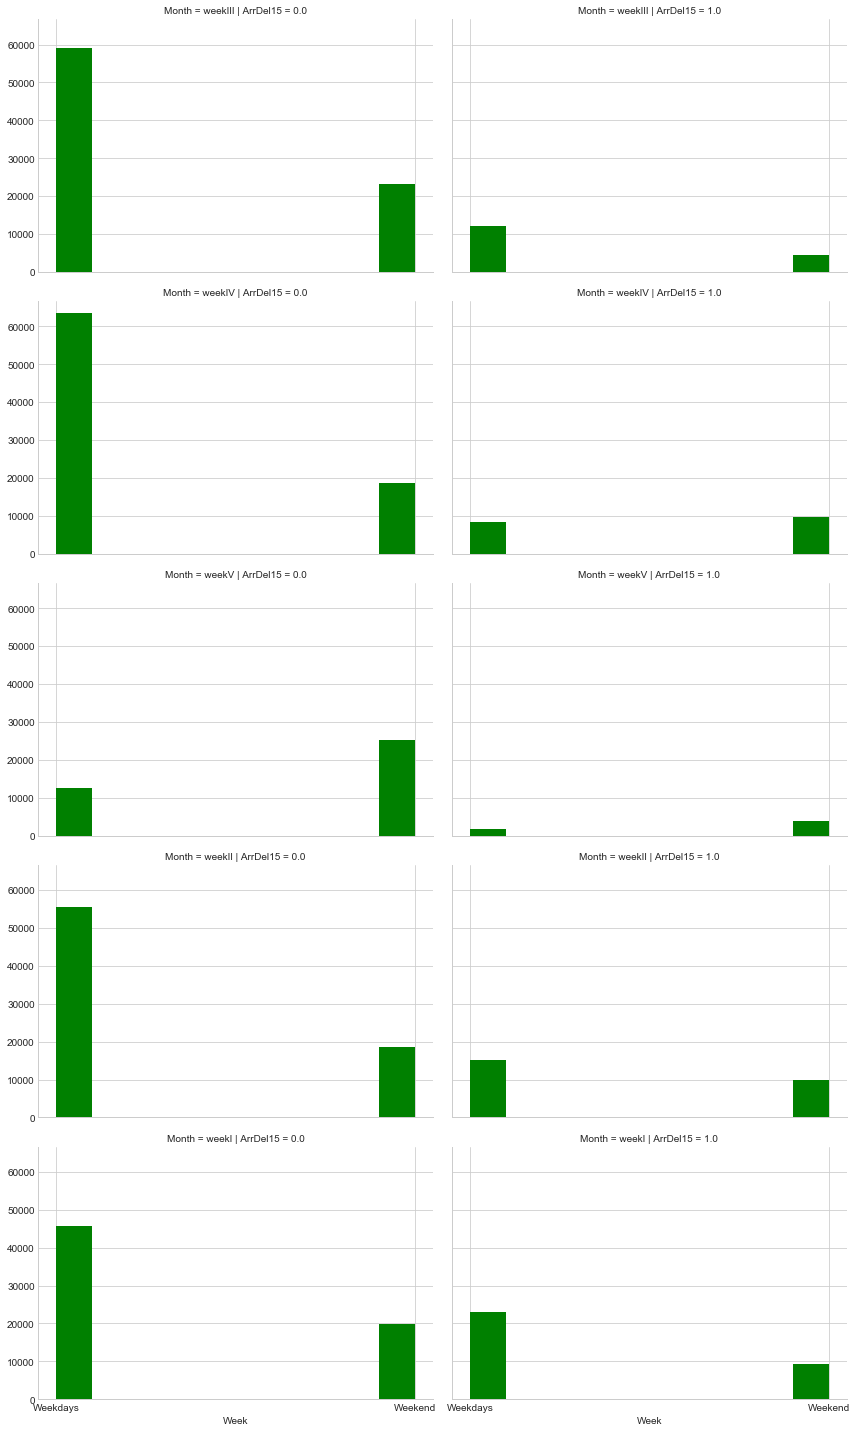

In [34]:
g=sns.FacetGrid(flights,col='ArrDel15',row='Month',size=4,aspect=1.5)
fig=g.map(plt.hist,'Week',color='g')

In [35]:
flights.columns

Index(['FlightDate', 'UniqueCarrier', 'AirlineID', 'Carrier', 'TailNum',
       'FlightNum', 'OriginAirportID', 'OriginAirportSeqID',
       'OriginCityMarketID', 'Origin', 'OriginCityName', 'OriginState',
       'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID',
       'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepTime',
       'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups',
       'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'ArrTime',
       'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups',
       'ArrTimeBlk', 'Cancelled', 'Diverted', 'CRSElapsedTime',
       'ActualElapsedTime', 'AirTime', 'Distance', 'DistanceGroup',
       'DivAirportLandings', 'Month', 'Week', 'Flight_route', 'Arrival_Time',
       'Departure_Time'],
      dtype='object')

In [36]:
df_clean_for_delay = flights.drop(['AirlineID', 'TailNum',
        'OriginAirportSeqID',
       'OriginCityMarketID', 'OriginCityName', 'OriginState',
       'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDelay',
       'DepartureDelayGroups', 'DepTimeBlk', 'WheelsOff',
       'WheelsOn', 'ArrDelay', 'ArrivalDelayGroups', 'ArrTimeBlk', 
       'CRSElapsedTime', 'ActualElapsedTime',
       'DistanceGroup', 'DivAirportLandings', 'Departure_Time'], axis = 1)

In [37]:
print(df_clean_for_delay.shape)
df_clean_for_delay.columns

(439645, 23)


Index(['FlightDate', 'UniqueCarrier', 'Carrier', 'FlightNum',
       'OriginAirportID', 'Origin', 'DestAirportID', 'DepTime',
       'DepDelayMinutes', 'DepDel15', 'TaxiOut', 'TaxiIn', 'ArrTime',
       'ArrDelayMinutes', 'ArrDel15', 'Cancelled', 'Diverted', 'AirTime',
       'Distance', 'Month', 'Week', 'Flight_route', 'Arrival_Time'],
      dtype='object')

                 FlightNum  OriginAirportID  DestAirportID   DepTime  \
FlightNum         1.000000         0.012075       0.001268  0.036046   
OriginAirportID   0.012075         1.000000       0.014820 -0.032010   
DestAirportID     0.001268         0.014820       1.000000  0.037593   
DepTime           0.036046        -0.032010       0.037593  1.000000   
DepDelayMinutes   0.044905         0.003020       0.006347  0.127205   
DepDel15          0.036174         0.015519       0.025348  0.208097   
TaxiOut           0.089062        -0.018628       0.019993 -0.048552   
TaxiIn           -0.043420         0.040684      -0.050601 -0.036115   
ArrTime           0.023940         0.001446       0.026097  0.648334   
ArrDelayMinutes   0.046653         0.002358       0.016614  0.110347   
ArrDel15          0.037636         0.012324       0.048006  0.160969   
Cancelled              NaN              NaN            NaN       NaN   
Diverted               NaN              NaN            NaN      

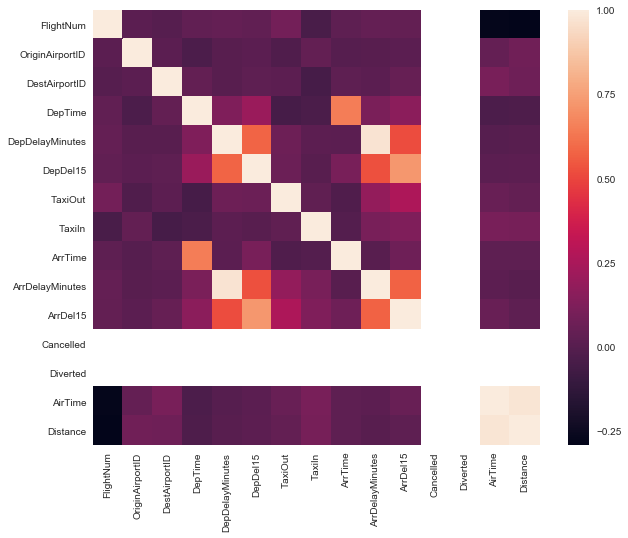

In [38]:
sns.set(style="white")
plt.figure(figsize = (10, 8))
corr = df_clean_for_delay.corr()
sns.heatmap(corr,  xticklabels=corr.columns, yticklabels=corr.columns)
print(corr)

In [39]:
df_clean_for_delay.drop(["AirTime"], axis = 1, inplace = True)
df_clean_for_delay.drop(["DepDelayMinutes"], axis = 1, inplace = True)

In [40]:
print(df_clean_for_delay.shape)
df_clean_for_delay.head()

(439645, 21)


,FlightDate,UniqueCarrier,Carrier,FlightNum,OriginAirportID,Origin,DestAirportID,DepTime,DepDel15,TaxiOut,...,ArrTime,ArrDelayMinutes,ArrDel15,Cancelled,Diverted,Distance,Month,Week,Flight_route,Arrival_Time
0,2017-01-17,AA,AA,494,11057,CLT,14107,1616.0,0.0,17.0,...,1842.0,0.0,0.0,0.0,0.0,1773.0,weekIII,Weekdays,CLT to PHX,Evening
1,2017-01-18,AA,AA,494,11057,CLT,14107,1614.0,0.0,13.0,...,1821.0,0.0,0.0,0.0,0.0,1773.0,weekIII,Weekdays,CLT to PHX,Evening
2,2017-01-19,AA,AA,494,11057,CLT,14107,1611.0,0.0,17.0,...,1826.0,0.0,0.0,0.0,0.0,1773.0,weekIII,Weekdays,CLT to PHX,Evening
3,2017-01-20,AA,AA,494,11057,CLT,14107,1656.0,1.0,18.0,...,1929.0,33.0,1.0,0.0,0.0,1773.0,weekIII,Weekdays,CLT to PHX,Evening
4,2017-01-21,AA,AA,494,11057,CLT,14107,1632.0,0.0,17.0,...,1858.0,2.0,0.0,0.0,0.0,1773.0,weekIII,Weekdays,CLT to PHX,Evening


In [41]:
df_clean_for_delay["FlightDate"] =df_clean_for_delay["FlightDate"].apply(lambda x: int(''.join(x.split("-"))))

In [42]:
le = LabelEncoder()

df_clean_for_delay["Unique_Carrier"] = le.fit_transform(df_clean_for_delay["UniqueCarrier"])
UniqueCarrier = list(le.classes_)
df_clean_for_delay["Carrier_Name"] = le.fit_transform(df_clean_for_delay["Carrier"])
Carrier = list(le.classes_)

df_clean_for_delay["Origin_Point"] = le.fit_transform(df_clean_for_delay["Origin"])
Origin = list(le.classes_)
df_clean_for_delay["Month_"] = le.fit_transform(df_clean_for_delay["Month"])
Origin = list(le.classes_)
df_clean_for_delay["Week_"] = le.fit_transform(df_clean_for_delay["Week"])
Origin = list(le.classes_)
df_clean_for_delay["Flightroute_"] = le.fit_transform(df_clean_for_delay["Flight_route"])
Origin = list(le.classes_)
df_clean_for_delay["Arrivaltime_"] = le.fit_transform(df_clean_for_delay["Arrival_Time"])
Origin = list(le.classes_)


In [43]:
df_clean_for_delay.drop(['UniqueCarrier','Carrier',
           'Origin','Month','Week','Flight_route','Arrival_Time'], axis=1, inplace=True)#Removing original encoded columns

In [44]:
df_clean_for_delay.head()

,FlightDate,FlightNum,OriginAirportID,DestAirportID,DepTime,DepDel15,TaxiOut,TaxiIn,ArrTime,ArrDelayMinutes,...,Cancelled,Diverted,Distance,Unique_Carrier,Carrier_Name,Origin_Point,Month_,Week_,Flightroute_,Arrivaltime_
0,20170117,494,11057,14107,1616.0,0.0,17.0,5.0,1842.0,0.0,...,0.0,0.0,1773.0,0,0,60,2,0,702,1
1,20170118,494,11057,14107,1614.0,0.0,13.0,6.0,1821.0,0.0,...,0.0,0.0,1773.0,0,0,60,2,0,702,1
2,20170119,494,11057,14107,1611.0,0.0,17.0,2.0,1826.0,0.0,...,0.0,0.0,1773.0,0,0,60,2,0,702,1
3,20170120,494,11057,14107,1656.0,1.0,18.0,3.0,1929.0,33.0,...,0.0,0.0,1773.0,0,0,60,2,0,702,1
4,20170121,494,11057,14107,1632.0,0.0,17.0,4.0,1858.0,2.0,...,0.0,0.0,1773.0,0,0,60,2,0,702,1


In [45]:
print(len(df_clean_for_delay.columns))

21


In [46]:

print(len(flights.columns))

53


In [47]:
dnotcol=pd.DataFrame(df_clean_for_delay)
#dnotcol.head()
print(len(dnotcol.columns))

21


In [48]:
from sklearn.decomposition import PCA
pca=PCA(n_components=8)
dnotcol_reduced=pca.fit_transform(dnotcol)
print(pca.explained_variance_ratio_)
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

[  3.74728001e-01   3.00294668e-01   2.37620079e-01   4.31334080e-02
   3.43650513e-02   9.13142553e-03   4.92807041e-04   2.07434325e-04]


array([ 37.47,  67.5 ,  91.26,  95.57,  99.01,  99.92,  99.97,  99.99])

Text(0,0.5,'Explained variance')

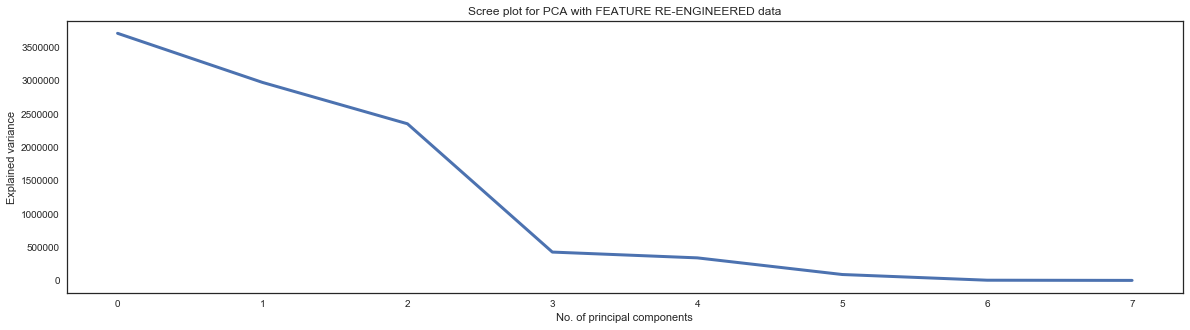

In [49]:
plt.figure(1, figsize=(20, 5))
plt.plot(pca.explained_variance_, linewidth=3)
plt.axis('tight')
plt.title('Scree plot for PCA with FEATURE RE-ENGINEERED data')
plt.xlabel('No. of principal components')
plt.ylabel('Explained variance')

In [51]:
#no of elbows in the graph is the number of principal components
pca=PCA(n_components=4)
dnotcol_reduced=pca.fit_transform(dnotcol)
print(pca.explained_variance_ratio_)
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

[ 0.374728    0.30029467  0.23762008  0.04313341]


array([ 37.47,  67.5 ,  91.26,  95.57])